In [18]:
# !pip install transformers
# !pip install diffusers
# !pip install torch
# !pip install accelerate
# !pip install cloths_segmentation  > /dev/null
# !pip install torchvision==0.15.0
# !pip install matplotlib
# !pip install albumentations
# !pip install iglovikov_helper_functions
# "Try this one: https://github.com/ternaus/cloths_segmentation"
# !pip install opencv-python

In [31]:
import transformers
import torch
import imageio
from diffusers import StableDiffusionInpaintPipeline
from cloths_segmentation.pre_trained_models import create_model
from pylab import imshow
import albumentations as albu
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image
import cv2
import numpy as np

In [21]:
model = create_model("Unet_2020-10-30")
model = model.eval()

/Users/anshul/miniconda3/lib/python3.10/site-packages/torch/hub.py:665: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


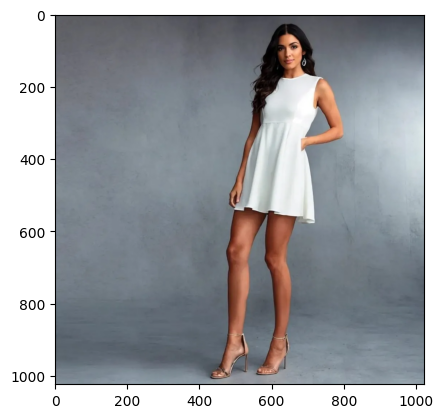

In [35]:
image = load_rgb("closetAI/test1.png")
imshow(image)

In [23]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

In [24]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [27]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [29]:
with torch.no_grad():
    prediction = model(x)[0][0]

In [32]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [33]:
mask = unpad(mask, pads)

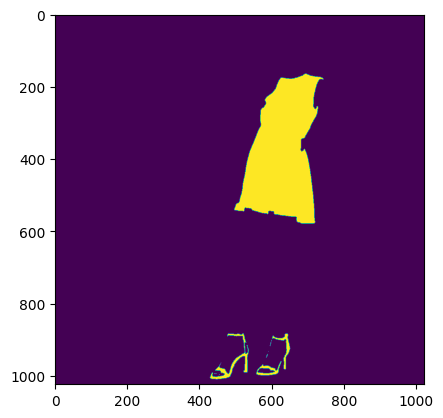

In [34]:
imshow(mask)

In [37]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float32,
)
prompt = "Woman wearing a red dress and boots"
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
image = pipe(prompt=prompt, image=image, mask_image=mask).images[0]
image.save("closetAI/red_dress.png")

unet/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 64 but got size 128 for tensor number 2 in the list.